<div class="cite2c-biblio"></div><img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> INF-393 - Machine Learning</h1>
    <h1> Tarea 3 - Métodos No Lineales </h1>

<p>
<br><center>_Javier Reyes_<strong> - </strong>_javier.reyes.12@sansano.usm.cl_<strong> - </strong>_201273524-6_ </center>
<br><center>_Marco Salinas_<strong> - </strong>_marco.salinas.12@sansano.usm.cl_<strong> - </strong>_201273589-0_ </center>
</p>
</center>

#  1 Small Circle inside Large Circle


<p  style="text-align: justify;"> 
    **(a)** Escriba una función que genere (aleatoriamente) $n$ datos etiquetados de la forma $\{(x_1; y_1), ... ,(x_n; y_n)\}, x_i \in R^2, y_i \in \{0, 1\}$, con una distribución de probabilidad que re eje la configuración linealmente inseparable que muestra la Fig. 1. Utilice esta función para crear 1000 datos de entrenamiento y 1000 datos de pruebas. Para medir la tendencia de los modelos a sobre-ajuste, agregue un 5% de ruido al dataset, generando x's cercanos a la frontera. Genere un gráfico que muestre datos de entrenamiento y pruebas, identificando cada clase con un color diferente.
</p>

In [86]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y))).T
    
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
                   np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

X_train,Y_train,X_test,Y_test = do_circles()

<p  style="text-align: justify;"> 
    Para lo que sigue de la actividad utilice la siguiente función para graficar las fronteras de clasificación en
base a la probabilidad, definida por un algoritmo, de un ejemplo a pertenecer a una clase en particular.
</p>

In [109]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type,lim):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap=plt.cm.Set3)
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='tab20b')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
        axis.set_title("Decision Tree Classifier")
    elif model_type != 'tree':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
        axis.set_title(model_type)
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='Greys')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"], levels=[-2, 0, 2])
    navy_train = mpatches.Patch(color='navy',label='Test data')
    lightblue_train = mpatches.Patch(color='lightblue',label='Train data')
    yellow_test = mpatches.Patch(color='yellow',label='Train data')
    violet_test = mpatches.Patch(color='violet',label='Test data')
    axis.legend(handles=[lightblue_train,yellow_test, violet_test, navy_train])
    axis.set_xlim(-lim,lim)
    axis.set_ylim(-lim,lim)
    plt.show()

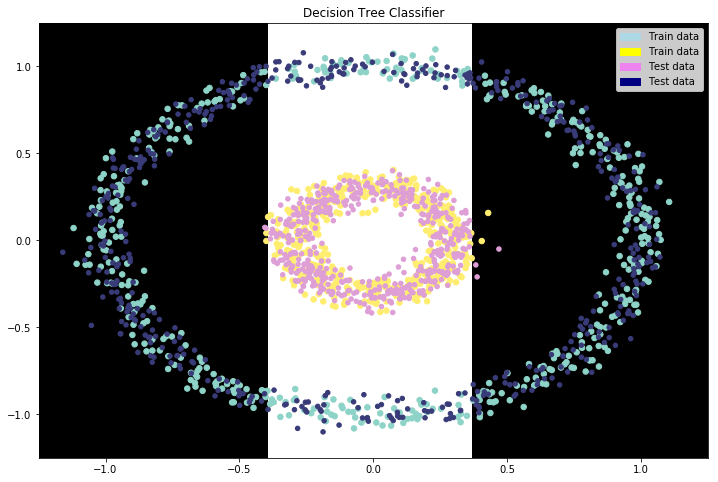

In [110]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
Tree.fit(X_train, Y_train)
plot_classifier(Tree,X_train,Y_train,X_test,Y_test,"tree",1.25)

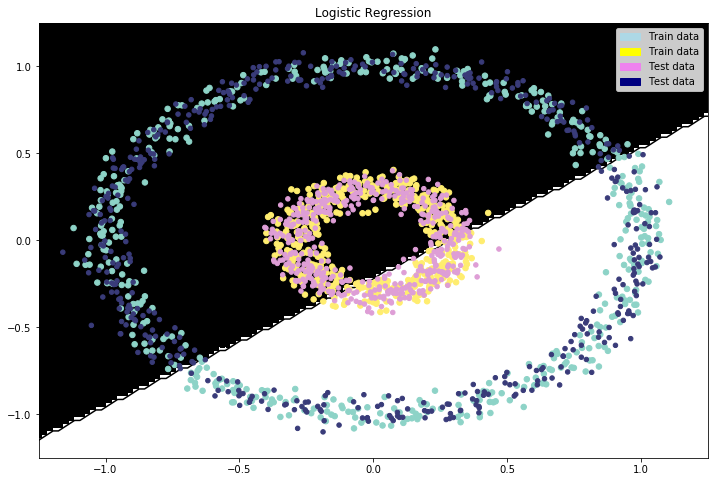

In [111]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=100, penalty='l2', tol=0.01)
LR.fit(X_train, Y_train)
plot_classifier(LR,X_train,Y_train,X_test,Y_test,"Logistic Regression",1.25)

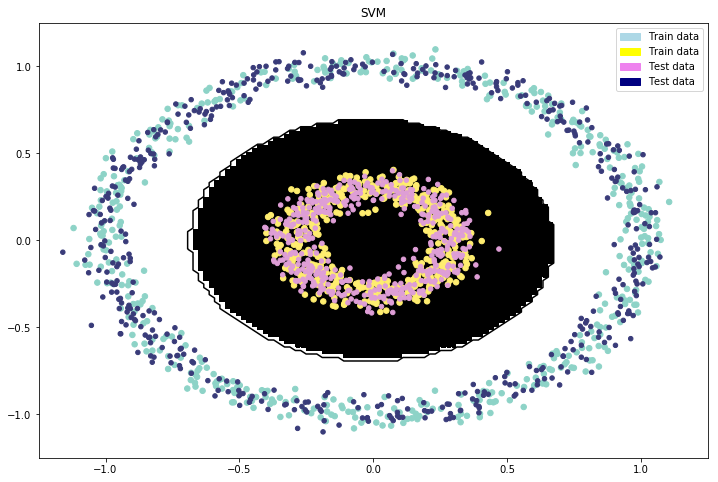

In [112]:
from sklearn.svm import SVC as SVM
model_SVM = SVM(kernel='rbf')
model_SVM.fit(X_train,Y_train)
plot_classifier(model_SVM,X_train,Y_train,X_test,Y_test,"SVM",1.25)

<p  style="text-align: justify;"> 
    **(b)** Demuestre __experimentalmente__ que una red neuronal artificial correspondiente a 1 sola neurona (i.e. sin capas escondidas) no puede resolver satisfactoriamente el problema. Puede utilizar la función de activación y el método de entrenamiento que prefiera. Sea convincente: por ejemplo, intente modificar los parámetros de la máquina de aprendizaje, reportando métricas que permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también la función plot classifier para que represente gráficamente la solución encontrada por la red neuronal. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.
</p>

In [128]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,RMSprop,Adam,Adagrad
n_h=1
Seq_model = Sequential()
Seq_model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
Seq_model.add(Dense(n_h, init='uniform', activation='sigmoid'))
Seq_model.compile(optimizer=SGD(lr=1, momentum=0.0, decay=0.0, nesterov=True), loss="binary_crossentropy", metrics=["accuracy"])#Stochastic Gradient Descent
history_train = Seq_model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0, callbacks=[])
history_test = Seq_model.fit(X_test, Y_test, epochs=50, batch_size=100, verbose=0,callbacks=[])
scores = Seq_model.evaluate(X_test, Y_test)
test_acc = scores[1]

1000/1000 [==============================] - 0s 84us/step


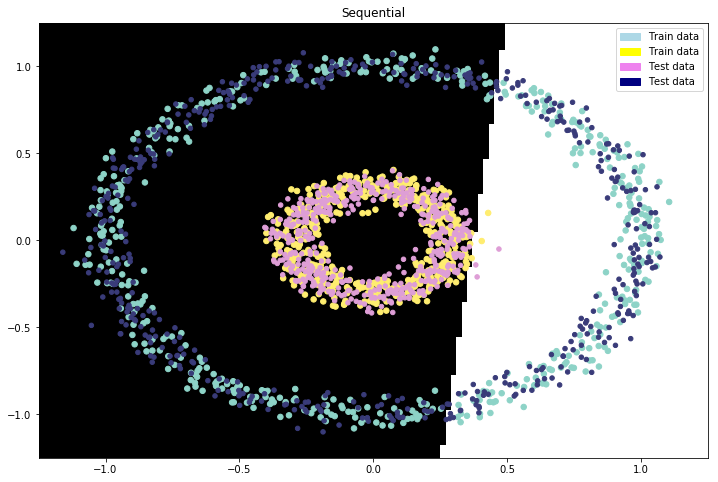

In [129]:
plot_classifier(Seq_model,X_train,Y_train,X_test,Y_test,"Sequential",1.25)

In [115]:
def Sequential_plot_loss(loss_train,loss_test):
    
    x = range(0,len(loss_train))
    plt.figure(figsize=(12,6))
    DTC_plot = plt.subplot(1,1,1)
    DTC_plot.plot(x, loss_train, label='Training Misclassification Error')
    DTC_plot.plot(x, loss_test, label='Testing Misclassification Error')
    plt.legend(bbox_to_anchor=(1,0.6))
    plt.ylabel('Miss Classification Error')
    plt.xlabel('epochs')
    plt.title("Sequential loss")
    plt.show()
    
def Sequential_plot_acc(acc_train,acc_test):
    
    acc_train_score = []
    acc_test_score = []
    for i in range(0,len(acc_train)):
        acc_train_score.append(1-acc_train[i])
        acc_test_score.append(1-acc_test[i])
    x = range(0,len(acc_train))
    plt.figure(figsize=(12,6))
    DTC_plot = plt.subplot(1,1,1)
    DTC_plot.plot(x, acc_train_score, label='Training Misclassification Error')
    DTC_plot.plot(x, acc_test_score, label='Testing Misclassification Error')
    plt.legend(bbox_to_anchor=(1,0.6))
    plt.ylabel('Miss Classification Error')
    plt.xlabel('epochs')
    plt.title("Sequential acc")
    plt.show()

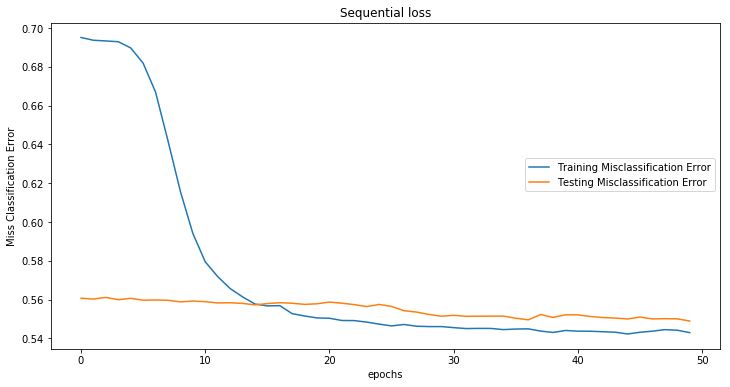

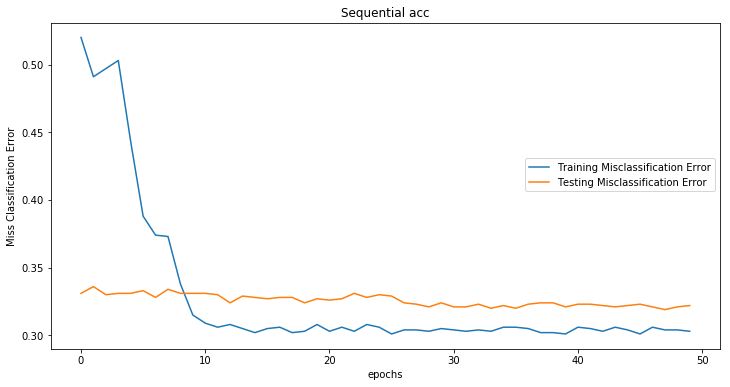

In [116]:
loss_train = history_train.history['loss']
loss_test = history_test.history['loss']
acc_train = history_train.history['acc']
acc_test = history_test.history['acc']

Sequential_plot_loss(loss_train,loss_test)
Sequential_plot_acc(acc_train,acc_test)

<p  style="text-align: justify;"> 
    **(c)** Demuestre **experimentalmente** que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el método de entrenamiento
que prefiera, pero en esta actividad puede optar tranquilamente por usar los hiper-parámetros que se 3 entregan como referencia en el código de ejemplo. Cambie el número de neuronas Nh en la red entre 2 y 32 en potencias de 2, graficando el error de entrenamiento y pruebas como función de Nh. Describa y explique lo que observa. Utilice la función *plot_classifier*, diseñada anteriormente, para construir gráficos de la solución en algunos casos representativos.

</p>

In [117]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,RMSprop,Adam,Adagrad
n_h=32
Seq_model = Sequential()
Seq_model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
Seq_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
Seq_model.compile(optimizer=SGD(lr=1, momentum=0.0, decay=0.0, nesterov=True), loss="binary_crossentropy", metrics=["accuracy"])#Stochastic Gradient Descent
history_train = Seq_model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0, callbacks=[])
history_test = Seq_model.fit(X_test, Y_test, epochs=50, batch_size=100, verbose=0,callbacks=[])

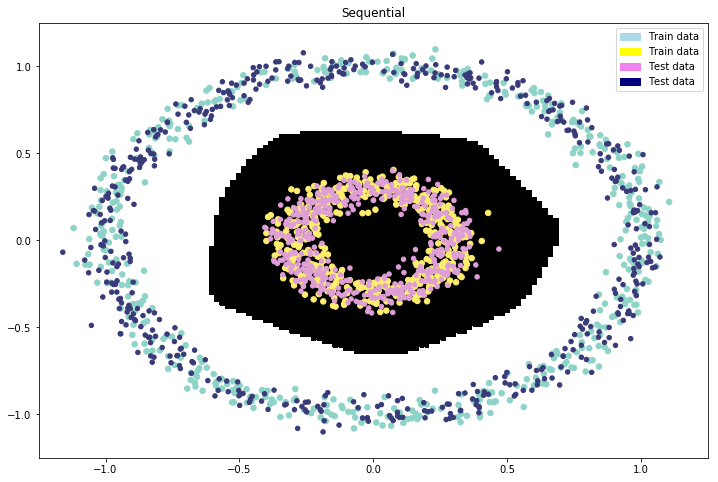

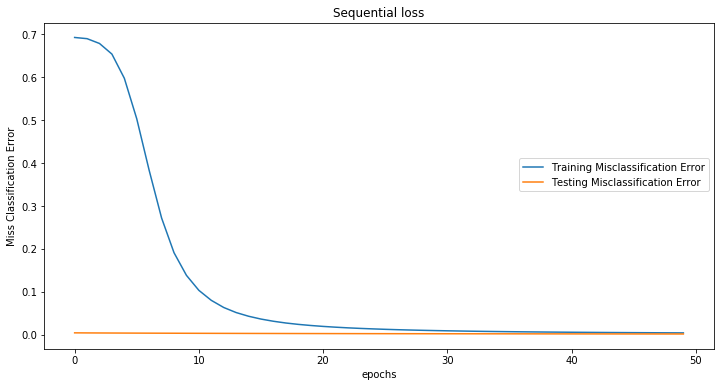

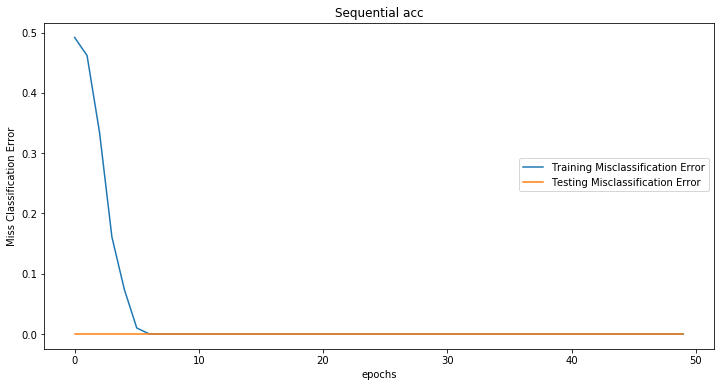

In [118]:
loss_train = history_train.history['loss']
loss_test = history_test.history['loss']
acc_train = history_train.history['acc']
acc_test = history_test.history['acc']
plot_classifier(Seq_model,X_train,Y_train,X_test,Y_test,"Sequential",1.25)
Sequential_plot_loss(loss_train,loss_test)
Sequential_plot_acc(acc_train,acc_test)

<p  style="text-align: justify;"> 
    **(d)** Demuestre **experimentalmente** que stump (árbol de clasificación de 1 nivel) no puede resolver satisfactoriamente el problema anterior. Puede utilizar el criterio y la función de partición que prefiera. Sea convincente: por ejemplo, intente modificar los parámetros de la máquina, reportando métricas que permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también la función *plot_classifier* para que represente gráficamente la solución encontrada por el árbol. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

</p>

Test Accuracy = 0.670000
F1 Score = 0.773946


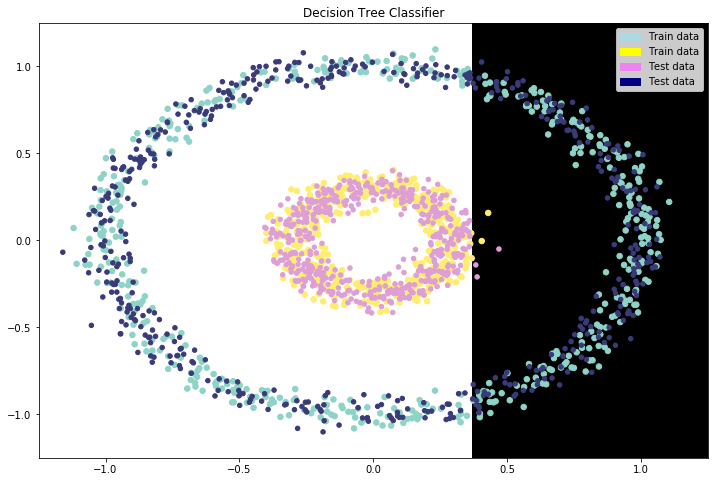

In [131]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier as Tree
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print("Test Accuracy = %f"%acc_test)
print("F1 Score = %f"%f1_score(Y_train, clf.predict(X_train)))
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree',1.25)

<p  style="text-align: justify;"> 
    **(e)** Demuestre experimentalmente que un árbol de clasificación de múltiples niveles puede resolver satisfactoriamente el problema estudiado. Puede utilizar el criterio y la función de partición que prefiera, pero puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el código de ejemplo. Cambie el número de niveles admitidos en el árbol Nt entre 2 y 20, graficando el error de entrenamiento y pruebas como función de Nt. Describa y explique lo que observa. Utilice la función plot classifier, dise~nada anteriormente, para construir gráficos de la solución en algunos casos representativos.
</p>

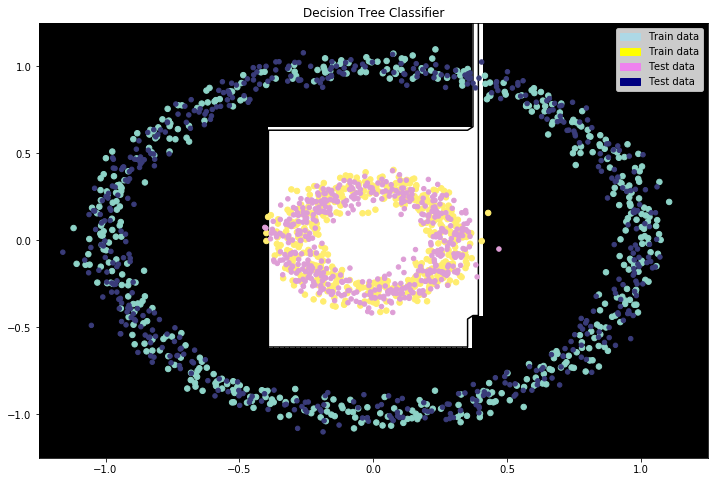

In [120]:
n_t=19
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
clf.fit(X_train,Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree",1.25)

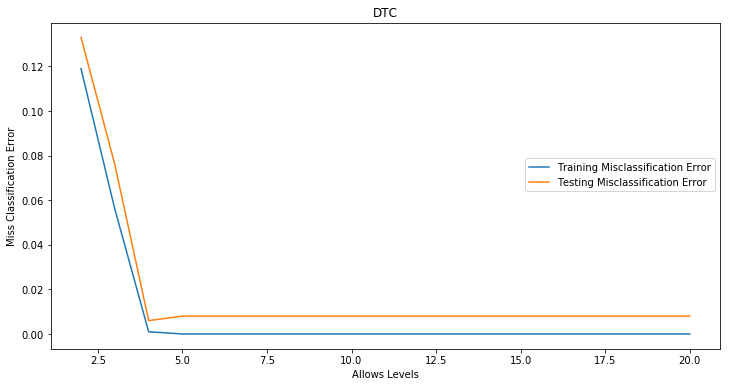

In [121]:
from sklearn.metrics import accuracy_score
def DTC_plot(X_train,Y_train,X_test,Y_test):
    
    n_ts = range(2,21)
    mse_DTC_train = []
    mse_DTC_test = []

    for n_t in n_ts:
        clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
        clf.fit(X_train, Y_train)

        y_pred_DTC_train = clf.predict(X_train)
        y_pred_DTC_test = clf.predict(X_test)

        mse_DTC_train.append(1-accuracy_score(Y_train, y_pred_DTC_train))
        mse_DTC_test.append(1-accuracy_score(Y_test, y_pred_DTC_test))

    plt.figure(figsize=(12,6))

    DTC_plot = plt.subplot(1,1,1)
    DTC_plot.plot(n_ts, mse_DTC_train, label='Training Misclassification Error')
    DTC_plot.plot(n_ts, mse_DTC_test, label='Testing Misclassification Error')
    plt.legend(bbox_to_anchor=(1,0.6))
    plt.ylabel('Miss Classification Error')
    plt.xlabel('Allows Levels')
    plt.title("DTC")
    plt.show()
    
DTC_plot(X_train,Y_train,X_test,Y_test)

<p  style="text-align: justify;"> 
    **(f)** Como ya se demostró experimentalmente que este problema es linealmente inseperable, ahora se pide experimentar otra alternativa. Para ello deberá realizar una proyección de los datos a un nuevo espacio dimensional (manifold) en el cual se reconozcan sus patrones no lineales, para poder trabajarlos con fronteras lineales. Utilice la técnica de PCA con la ayuda de un Kernel Gaussiano  para extraer sus vectores con dimensión infinita de mayor varianza.
</p>

In [122]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

<p  style="text-align: justify;"> 
    **(g)** Ajuste un algoritmo de aprendizaje con fronteras lineal para los datos proyectados en este nuevo espacio que captura sus componentes no lineales, muestre graficamente que el problema ahora puede ser resulto con estos métodos. Reporte métricas para evaluar el desempeño, comente y concluya.
</p>

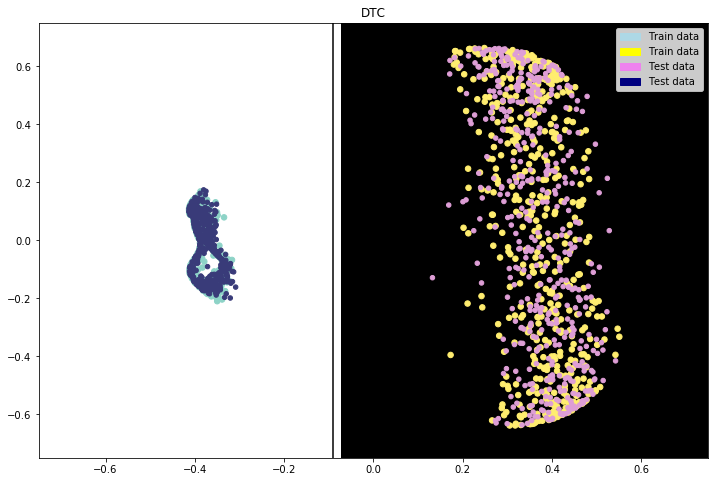

In [123]:
Tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
Tree.fit(Xkpca_train, Y_train)ana
plot_classifier(Tree,Xkpca_train,Y_train,Xkpca_test,Y_test,"DTC",0.75)

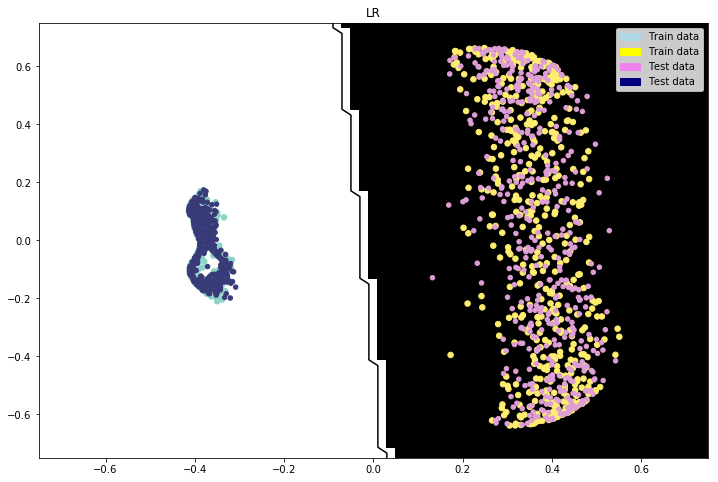

In [124]:
LR = LogisticRegression(C=100, penalty='l2', tol=0.01)
LR.fit(Xkpca_train, Y_train)
plot_classifier(LR,Xkpca_train,Y_train,Xkpca_test,Y_test,"LR",0.75)

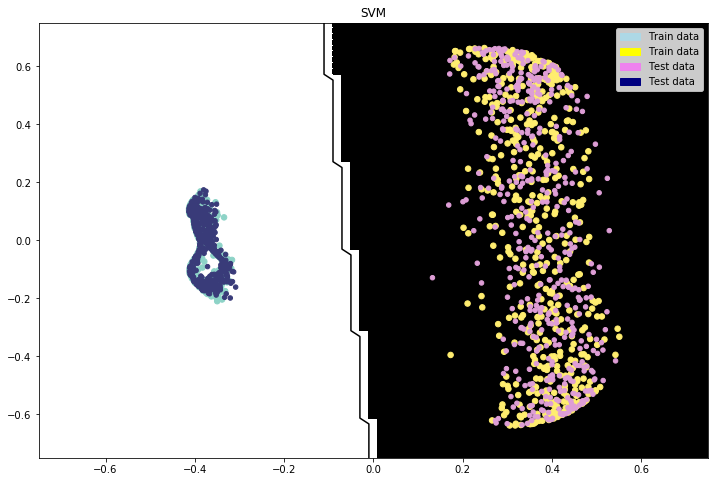

In [125]:
model_SVM = SVM(kernel='linear')
model_SVM.fit(Xkpca_train,Y_train)
plot_classifier(model_SVM,Xkpca_train,Y_train,Xkpca_test,Y_test,"SVM",0.75)

# 2 Bike Sharing: Predicción de Demanda Horaria

<p  style="text-align: justify;"> 
    En esta sección simularemos nuestra participación en el desafío Bike Sharing Demand de Kaggle. El objetivo es predecir la demanda de bicicletas sobre la red Capital Bikeshare de la ciudad de Washington, D.C., en función de la hora del día y otras variables descritas en la tabla 1. En principio, y como muestra la figura, la función es altamente no lineal y no determinista como función de la hora del día. Su objetivo será entrenar un modelo para obtener un puntaje correspondiente al top-100 del "leaderboard" final, es decir superior o igual a 0.37748. La función utilizada para evaluar este concurso Kaggle se proporciona en la siguiente ecuación:
</p>

$$
 E_{bikes}(y, \hat{y}) = \sqrt{\frac{1}{n} \sum_i (ln(y_i + 1) - ln(\hat{y}_i+1))^2},
$$
<p  style="text-align: justify;">
donde $y, \hat{y} \in \mathbb{R}^n$ denotan los vectores de observaciones y predicciones respectivamente. Correción de la fórmula desde: https://www.kaggle.com/c/bike-sharing-demand#evaluation
<br><br>
Como el dataset de pruebas original no está disponible se fabricará uno, correspondiente al 20% de los datos de entrenamiento. Además, se pondrá a su disposición un subconjunto independiente de datos con propósitos de validación.

</p>

<img src="grafico_robot.png" style="height:300px">


<p  style="text-align: justify;"> 
    **(a)** Cargue los datos de entrenamiento y pruebas como dataframes de _pandas_. Describa las variables involucradas en el problema, explorando el tipo de datos de que se trata, el número de valores distintos y, si corresponde, un gráfico (e.g. un histograma) que resuma su comportamiento. Su primera operación de pre-procesamiento de datos será obtener la hora del día desde el campo fecha (que en este momento es de tipo string), creando una nueva columna denominada hour y de tipo int. Para hacer esta operación se concatenarán los dataframes de entrenamiento y pruebas y luego se volverán a separar manteniendo la separación original.

</p>

In [1]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print('\nSummary - dataframe completo:\n')
print(df.describe())
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

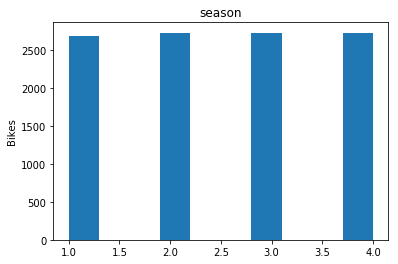

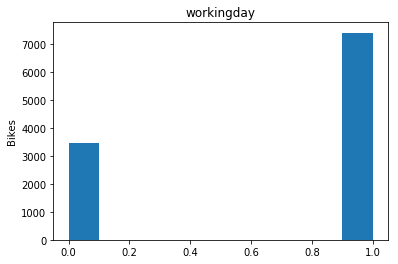

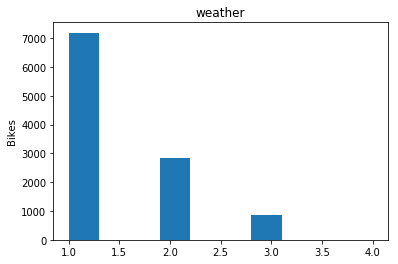

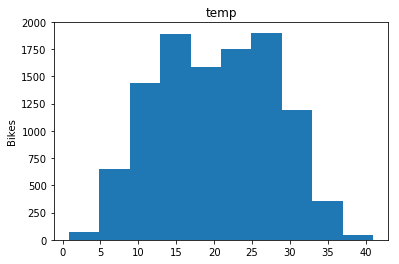

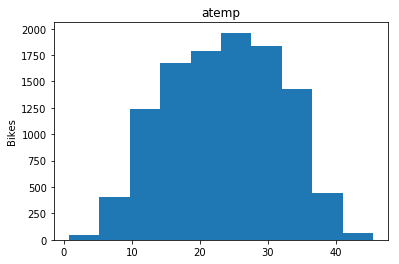

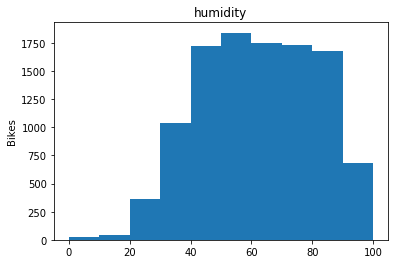

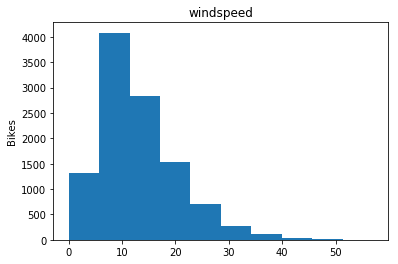

In [8]:
import matplotlib.pyplot as plt
for column in ['season','workingday','weather','temp', 'atemp', 'humidity', 'windspeed']:
    plt.hist(df[column])
    plt.title(column)
    plt.ylabel("Bikes")
    plt.show()

<p  style="text-align: justify;"> 
    **(b)** Entrene un árbol de regresión para resolver el problema usando parámetros por defecto. Con este fin, construya una matriz $X_{train}$ de forma $n_{train} \times d_1$ que contenga los datos de entrenamiento en sus filas, seleccionando las columnas que desee/pueda utilizar para el entrenamiento. Implemente además, la función de evaluación que hemos definido anteriormente para este problema. Evalúe el árbol de regresión ajustado a los datos de entrenamiento sobre el conjunto de entrenamiento y pruebas. Construya un gráfico que compare las predicciones con los valores reales. En este punto usted debiese tener un modelo con puntaje del orden de 0:59, lo que lo dejará más o menos en la posición 2140 de la competencia.

</p>

In [5]:
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


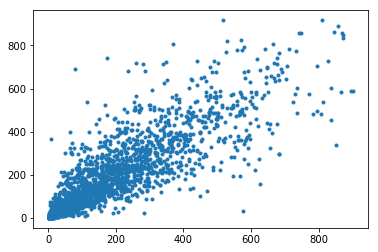

In [20]:
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt

Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.loc[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print("SCORE TEST=%f"%score_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print("KAGG EVAL TRAIN =%f"%kagg_train)
print("KAGG EVAL TEST =%f"%kagg_test)
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

<p  style="text-align: justify;"> 
    **(c)** Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones a los hiper-parámetros del modelo. Por ejemplo, como estos modelos tienden a sobre-ajustar, podría intentar limitar la profundidad del árbol (¿Por qué esto debiese ayudar?). Naturalmente, está absolutamente prohibido tomar este tipo de decisiones en función del resultado de pruebas. Debe realizar estas elecciones evaluando sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del entrenamiento. Con estas modificaciones debiese poder mejorar su ranking en unas 300 posiciones.

</p>

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def train_tree(X,Y,max_depth,crit=["mse","mae"]):
    scores = []
    for d in range(1,max_depth):
        for c in crit:
            model = Tree(random_state=0,max_depth=d,criterion=c)
            score_bike = cross_val_score(model, X,Y, scoring=make_scorer(eval_bikemodel)).mean()
            scores.append([model,score_bike, c, d])
    return scores

In [13]:
scores = train_tree(np.concatenate([X_train,X_val]),np.concatenate([Y_train,Y_val]),30)

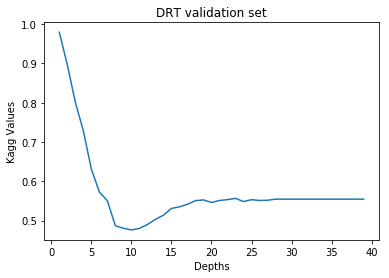

KAGG EVAL VAL =0.480193


In [14]:
max_depth = 40
depths = range(1,max_depth)
kagg_vals =  []
i_max = 1
kagg_aux = 1
for i in depths:
    model = Tree(random_state=0,max_depth=i)
    model.fit(X_train,Y_train)
    #model.fit(X_val,Y_val)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    kagg_vals.append(kagg_val)
    if kagg_aux > kagg_val:
        kagg_aux = kagg_val
        i_max = i
plt.plot(depths,kagg_vals)
plt.xlabel("Depths")
plt.ylabel("Kagg Values")
plt.title("DRT validation set")
plt.show()
print("KAGG EVAL VAL =%f"%kagg_vals[i_max])

In [15]:
def best_score_cv(scores):
    sorted_scores = sorted(scores, key=(lambda x: x[1]), reverse=False)
    print("Criterion:",sorted_scores[0][2])
    print("Max Depth: %f"%sorted_scores[0][3])
    print("KAGG EVAL VAL =%f"%sorted_scores[0][1])
    return sorted_scores
bs = best_score_cv(scores)

Criterion: mse
Max Depth: 9.000000
KAGG EVAL VAL =0.566530


<p  style="text-align: justify;"> 
    **(d)**  Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones sobre la representación utilizada para aprender desde los datos. Por ejemplo, los histogramas que construyó en el punto (a) así como la forma especial de la función de evaluación, sugieren una cierta transformación de la variable respuesta. Podría intentar también normalizando los datos o normalizando la respuesta. Otra opción es intentar rescatar algo más acerca de la fecha (anteriormente sólo se extrajo la hora), como por ejemplo el año o el día de la semana ('lunes','martes', etc) que corresponde. Sea creativo, este paso le debiese reportar un salto de calidad muy significativo. Una observación importante es que si hace una transformación a la variable respuesta (por ejemplo raíz cuadrada), debe invertir esta transformación antes de evaluar el desempeño con *eval_bikemodel* (por ejemplo, elevar al cuadrado si tomó raíz cuadrada). Con modificaciones de este tipo, podría mejorar su ranking en unas 1000 posiciones, entrando ya al top-1000 con un score del orden de $0.45$.

</p>

In [16]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek #0:Lunes,6:Domingo
df['cday'] = pd.to_numeric(df['cday'])
df['cyear'] = pd.to_datetime(df['datetime']).dt.year #Año
df['cyear'] = pd.to_numeric(df['cyear'])
df['cmonth'] = pd.to_datetime(df['datetime']).dt.month #1:Enero,12:Diciembre
df['cmonth'] = pd.to_numeric(df['cmonth'])
df['holiday'] = pd.to_numeric(df['holiday'])
df['workingday'] = pd.to_numeric(df['workingday'])
df['tday'] = df['holiday'] + 2*df['workingday']
Xdf=df.loc[:,['season','weather','temp','atemp','humidity','windspeed','hour','tday','cday','cmonth','cyear']]
Xdf
#Xdf.head()

,season,weather,temp,atemp,humidity,windspeed,hour,tday,cday,cmonth,cyear
0,1,1,9.84,14.395,75,0.0000,3,0,5,1,2011
1,1,1,9.84,14.395,75,0.0000,4,0,5,1,2011
2,1,2,9.84,12.880,75,6.0032,5,0,5,1,2011
3,1,1,9.02,13.635,80,0.0000,6,0,5,1,2011
4,1,1,8.20,12.880,86,0.0000,7,0,5,1,2011
5,1,1,13.12,17.425,76,0.0000,9,0,5,1,2011
6,1,2,18.86,22.725,72,19.0012,14,0,5,1,2011
7,1,2,17.22,21.210,82,19.9995,16,0,5,1,2011
8,1,2,18.04,21.970,82,19.0012,17,0,5,1,2011
9,1,3,17.22,21.210,88,16.9979,18,0,5,1,2011


In [17]:
#Xdf = (Xdf - Xdf.mean()) / (Xdf.max() - Xdf.min())
#Ydf = (Ydf - Ydf.mean()) / (Ydf.max() - Ydf.min())
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

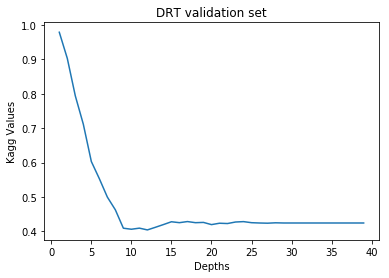

KAGG EVAL VAL =0.411473


In [18]:
max_depth = 40
depths = range(1,max_depth)
kagg_vals =  []
i_max = 1
kagg_aux = 1
for i in depths:
    model = Tree(random_state=0,max_depth=i)
    model.fit(X_train,Y_train)
    #model.fit(X_val,Y_val)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    kagg_vals.append(kagg_val)
    if kagg_aux > kagg_val:
        kagg_aux = kagg_val
        i_max = i
plt.plot(depths,kagg_vals)
plt.xlabel("Depths")
plt.ylabel("Kagg Values")
plt.title("DRT validation set")
plt.show()
print("KAGG EVAL VAL =%f"%kagg_vals[i_max])

In [19]:
scores = train_tree(np.concatenate([X_train,X_val]),np.concatenate([Y_train,Y_val]),30)
bs = best_score_cv(scores)

Criterion: mse
Max Depth: 10.000000
KAGG EVAL VAL =0.469798


In [20]:
bs[0][0].fit(X_train,Y_train)
print("Top BikeScore Test: %f"%eval_bikemodel(bs[0][0].predict(X_test),Y_test))

Top BikeScore Test: 0.423805


<p  style="text-align: justify;"> 
    **(e)** Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones que haya descubierto hasta este punto. Un detalle importante es que antes de entrenar la SVM sería aconsejable hacer dos tipos de pre-procesamiento adicional de los datos: (i) codificar las variables categóricas en un modo apropiado - por ejemplo como vector binario con un 1 en la posición del valor adoptado-, (ii) escalar los atributos de modo que queden centrados y con rangos comparables. Usando parámetros por defecto para la SVM debiese obtener un score del orden de $0.344$, quedando definitivamente en el top-10 de la competencia.
</p>

In [3]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek #0:Lunes,6:Domingo
df['cday'] = pd.to_numeric(df['cday'])
df['cyear'] = pd.to_datetime(df['datetime']).dt.year #Año
df['cyear'] = pd.to_numeric(df['cyear'])
df['cmonth'] = pd.to_datetime(df['datetime']).dt.month #1:Enero,12:Diciembre
df['cmonth'] = pd.to_numeric(df['cmonth'])

Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cyear','cmonth','cday']]

#PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])

#normalización + 1 para eliminar los 0 del logaritmo
Ydf = np.log(df.loc[:,'count']+1)
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

In [27]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

In [28]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

In [29]:
score_test = model.score(X_test,Y_pred_test)
print("SCORE TEST=%f"%score_test)
kagg_train = eval_bikemodel(np.exp(Y_pred_train)-1,np.exp(Y_train)-1)
kagg_val = eval_bikemodel(np.exp(Y_pred_val)-1,np.exp(Y_val)-1)
kagg_test = eval_bikemodel(np.exp(Y_pred_test)-1,np.exp(Y_test)-1)
print("KAGG EVAL TRAIN =%f"%kagg_train)
print("KAGG EVAL VAL =%f"%kagg_val)
print("KAGG EVAL TEST =%f"%kagg_test)

SCORE TEST=1.000000
KAGG EVAL TRAIN =0.241435
KAGG EVAL VAL =0.302894
KAGG EVAL TEST =0.336167


<p  style="text-align: justify;"> 
    **(f)** Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-parámetros de la máquina ($C$, $\epsilon$ o la misma función de kernel). Naturalmente, está absolutamente prohibido tomar este tipo de decisiones de diseño mirando el resultado de pruebas. Debe realizar estas elecciones evaluando sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del entrenamiento.


</p>

In [ ]:
from sklearn.svm import SVR
rango = range(1,np.linalg.matrix_rank(X_val))
kagg_vals= []
for i in rango:
    model = SVR(C=i,epsilon=0.01)
    model.fit(X_train,Y_train)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(np.exp(Y_pred_val)-1,np.exp(Y_val)-1)
    kagg_vals.append(kagg_val)
plt.plot(rango,kagg_vals)
plt.show()
#kagg_train = eval_bikemodel(Y_pred_train,Y_train)
#kagg_val = eval_bikemodel(Y_pred_val,Y_val)
#print("KAGG EVAL TRAIN =%f"%kagg_train)
#print("KAGG EVAL VAL =%f"%kagg_val)

<p  style="text-align: justify;"> 
    **(g)**  Evaúe el efecto de utilizar el dataset de validación para entrenamiento y seleccionar los parámetros estructurales del árbol de clasificación y la SVM usando validación cruzada. El código de ejemplo para esto ha sido proporcionado en las tareas 1 y 2, pero se adjunta de nuevo a continuación
</p>

In [ ]:
from sklearn.svm import SVR

def eval_bikemodel_log(y_predict,y_true,**kwargs):
    y_predict = np.exp(y_predict)-1
    y_true    = np.exp(y_true)-1
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

def train_svm(X_train,Y_train,max_c=20,min_c=1):
    scores = []
    c_range = range(min_c,max_c+1)
    e_range = [0.01,0.05,0.1,0.5,1,10]
    for c in c_range:
        for e in e_range:
            model = SVR(C=c,epsilon=e,kernel='rbf')
            score_bike = cross_val_score(model, X_train,Y_train, scoring=make_scorer(eval_bikemodel_log)).mean()
            scores.append([model,score_bike, c, e])
    return scores
scores = train_svm(np.concatenate([X_train,X_val]),np.concatenate([Y_train,Y_val]))

In [ ]:
bs = best_score_cv(scores)

<p  style="text-align: justify;"> 
    **(h)**  Evalúe el efecto de utilizar un ensamblado de 2 máquinas de aprendizaje para predecir la demanda total de bicicletas. Un modelo se especializará en la predicción de la demanda de bicicletas de parte de usuarios registrados y otra en la predicción de la demanda de usuarios casuales. Hay razones claras para pensar que los patrones son distintos.
</p>

In [ ]:
Ydf=df.ix[:,'count'] #demanda total
Ydf=df.ix[:,'registered'] #demanda registrada
Ydf=df.ix[:,'casual'] #demanda casual

Ydf_r=np.log(df['registered']+1) #demanda registrada
Yr_train = Ydf_r[0:ntrain].values
Yr_val = Ydf_r[ntrain:nval].values
Yr_test = Ydf_r[nval:].values

Ydf_c=np.log(df['casual']+1) #demanda casual
Yc_train = Ydf_c[0:ntrain].values
Yc_val = Ydf_c[ntrain:nval].values
Yc_test = Ydf_c[nval:].values

model_r = SVR(C=t[3],kernel=t[4],epsilon=t[5])
model_c = SVR(C=t[3],kernel=t[4],epsilon=t[5])

model_r.fit(np.concatenate([X_train,X_val]),np.concatenate([Yr_train,Yr_val]))
model_c.fit(np.concatenate([X_train,X_val]),np.concatenate([Yc_train,Yc_val]))

Yr_pred_test = model_r.predict(X_test)
Yc_pred_test = model_c.predict(X_test)

print("Top BikeScore Test registered: %f"%eval_bikemodel_log(Yr_pred_test,Yr_test))
print("Top BikeScore Test casual    : %f"%eval_bikemodel_log(Yc_pred_test,Yc_test))
print("Top BikeScore Test count     : %f"%eval_bikemodel_log(Yr_pred_test+Yc_pred_test,Y_test))

<p  style="text-align: justify;"> 
    **(i)**  Evalúe el efecto de utilizar un algoritmo genérico para ensamblar máquinas de aprendizaje para predecir la demanda total de bicicletas. Puede experimentar con una sola técnica (e.g. Random Forest), discuta la evolución a medida que aumenta el número de máquinas.
</p>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def train_random_forest(X_train,Y_train,X_val,Y_val, estimators, depth):
    model = RandomForestRegressor(n_estimators=estimators,max_depth=depth, random_state=0)
    model.fit(X_train, Y_train)

    y_val_pred = model.predict(X_val)
    
    return (model,eval_bikemodel_log(y_val_pred,y_val),estimators,depth)

def best_scores_rfr(scores):
    sorted_scores = sorted(scores, key=(lambda x: x[1]), reverse=False)
    return sorted_scores[0]

scores = []
count,current=20*20,1
for e in range(1,20):
    for d in range(1,20):
        scores.append(train_random_forest(X_train,Y_train,X_val,Y_val, e, d))
        print ("%d/%d"%(current,count), end="\r")
        current+=1
        
t=best_scores_rfr(scores)

In [ ]:
t.fit(X_train,Y_train)
y_test_pred = t.predict(X_test)

print("Top BikeScore Test: %f"%eval_bikemodel_log(y_test_pred,Y_test))

# 3 Calidad de un vino

<p  style="text-align: justify;"> 
Dentro de las muchas variedades de vino existentes, algunas gustan más que otras, esto es debido al gusto de una persona en particular o bien a la gran cantidad de químicos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difícil. <br>
Para esta actividad se trabajará con dos datasets asociados a las variantes tinto y blanco del vino portugués "Vinho Verde"[4]. Debido a temas privados solo se cuenta con las característcas fisioquímicas asociadas a un vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente link. Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar, _quality_, es un valor entero entre 0 y 10.
</p>

Descripción: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

<p  style="text-align: justify;"> 
    **(a)**  Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

</p>

In [179]:
import pandas as pd
import numpy as np
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_red['type'] = 0

df_white = pd.read_csv("winequality-white.csv",sep=";")
df_white['type'] = 1

df = pd.concat([df_red,df_white], axis=0)

<p  style="text-align: justify;">
    El nuevo dataframe contiene 1599 datos sobre vino tinto, y 4898 sobre vino blanco. Cada uno de estos datos posee 12 atributos. En la descripción del dataset se nos advierte que mucho de estos atributos pueden estar correlacionados por lo tanto, tiene sentido aplicar algún tipo de selección de atributos. <br>
</p>

<ol>
<li> **fixed acidity** - la mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).</li>
<li> **volatile acidity** - la cantidad de ácido acético en el vino, que a niveles demasiado altos puede conducir a un desagradable sabor a vinagre.</li>
<li> **citric acid** - encontrado en pequeñas cantidades, el ácido cítrico puede agregar 'frescura' y sabor a los vinos. </li>
<li> **residual sugar** - la cantidad de azúcar que queda después de que la fermentación se detiene, es raro encontrar vinos con menos de 1 gramo / litro y los vinos con más de 45 gramos / litro se consideran dulces.</li>
<li> **chlorides** - la cantidad de sal en el vino. </li>
<li> **free sulfur dioxide** - la forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.</li>
<li> **total sulfur dioxide** - cantidad de S02 en forma libre y unida; en bajas concentraciones, el SO2 es casi indetectable en el vino, pero a concentraciones superiores a 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino. </li>
<li> **density** - la densidad del vino es cercana a la del agua según el porcentaje de contenido de alcohol y azúcar.</li>
<li> **pH** - describe cuán ácido o básico es un vino en una escala de 0 (muy ácida) a 14 (muy básica); la mayoría de los vinos están entre 3-4 en la escala de pH.</li>
<li> **sulphates** - un aditivo de vino que puede contribuir a los niveles de gas de dióxido de azufre (S02), que actúa como un antimicrobiano y antioxidante.</li>
<li> **alcohol** - el porcentaje de contenido de alcohol del vino. </li>
<li> **quality** - calidad del vino (puntaje entre 0 y 10). </li>
</ol>

<p  style="text-align: justify;"> 
    **(b)**  Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de buena calidad o no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas (25%) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.
</p>

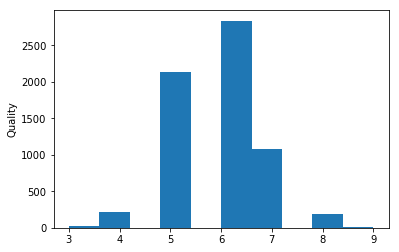

In [180]:
plt.hist(df['quality'])
plt.ylabel("Quality")
plt.show()

In [181]:
from sklearn.model_selection import train_test_split
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]

df.dropna(axis=0)
df.drop(['quality'],axis=1,inplace=True)

X = df.iloc[:,0:12] #todos los atributos
y = df.good_quality.values # Variable binaria 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


<p  style="text-align: justify;"> 
    **(c)**  Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los hiper-parámetros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las dos clases mida la métrica F1-_score_ sobre el conjunto de entrenamiento y de pruebas.

</p>

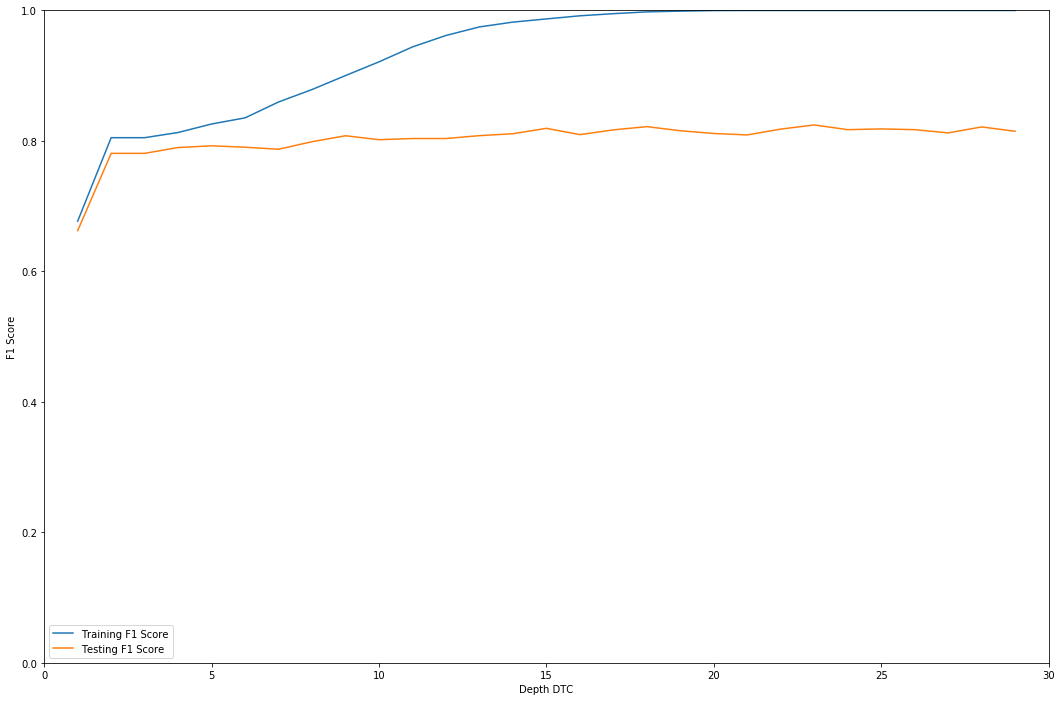

Test F1 Score 0.824486 con 22 estimadores


In [182]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def DTC_plot(X_train , y_train, X_test, y_test):

    Depths = range(1,30)

    F1Score_Train = []
    F1Score_Test = []

    for i in Depths:
        model_DTC = DTC(max_depth = i)

        model_DTC.fit(X_train , y_train)

        y_pred_DTC_train = model_DTC.predict(X_train)
        y_pred_DTC_test = model_DTC.predict(X_test)

        F1Score_Train.append(f1_score(y_train, y_pred_DTC_train))
        F1Score_Test.append(f1_score(y_test, y_pred_DTC_test))

    plt.figure(figsize=(18,12))

    DTC_plot = plt.subplot(1,1,1)
    DTC_plot.plot(Depths, F1Score_Train, label='Training F1 Score')
    DTC_plot.plot(Depths, F1Score_Test, label='Testing F1 Score')
    plt.legend(loc=3)
    plt.ylabel('F1 Score')
    plt.xlabel('Depth DTC')
    plt.axis([0,30,0.0, 1.0])
    plt.show()
    
    ind_max = np.argmax(F1Score_Test)
    print("Test F1 Score %f con %d estimadores" %(F1Score_Test[ind_max], ind_max))

DTC_plot(X_train , Y_train, X_test, Y_test)

<p  style="text-align: justify;"> 
    **(d)**  Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de _Random Forest_. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n_estimators*), realice un gráfico resumen del F1-_score_ de entrenamiento y de pruebas en función de este hiper-parámetro.

</p>

In [183]:
def F1Score_plot(model, X_train , y_train,X_test, y_test):

    Estimators = range(1,25)

    F1Score_Train = []
    F1Score_Test = []

    for i in Estimators:
        if (model == RandomForestClassifier):
            model_DTC = model(n_estimators = i, max_depth = 20, n_jobs =-1)
        else:
            model_DTC = model(base_estimator=DTC(max_depth=20), n_estimators = i)

        model_DTC.fit(X_train , y_train)
        y_pred_DTC_train = model_DTC.predict(X_train)
        y_pred_DTC_test = model_DTC.predict(X_test)

        F1Score_Train.append(f1_score(y_train, y_pred_DTC_train))
        F1Score_Test.append(f1_score(y_test, y_pred_DTC_test))

    plt.figure(figsize=(18,12))

    RF_DTC_plot = plt.subplot(1,1,1)
    RF_DTC_plot.plot(Estimators, F1Score_Train, label='Training F1 Score')
    RF_DTC_plot.plot(Estimators, F1Score_Test, label='Testing F1 Score')
    plt.legend(loc=3, fontsize=18)
    plt.ylabel('F1 Score', fontsize=18)
    plt.xlabel('Number of Estimators', fontsize=18)
    plt.axis([0, 25,0.0, 1.0])
    plt.legend(loc=3, fontsize=18)
    
    ind_max = np.argmax(F1Score_Test)
    print("Test F1 Score %f con %d estimadores" %(F1Score_Test[ind_max], ind_max))
    plt.show()

Test F1 Score 0.857687 con 22 estimadores


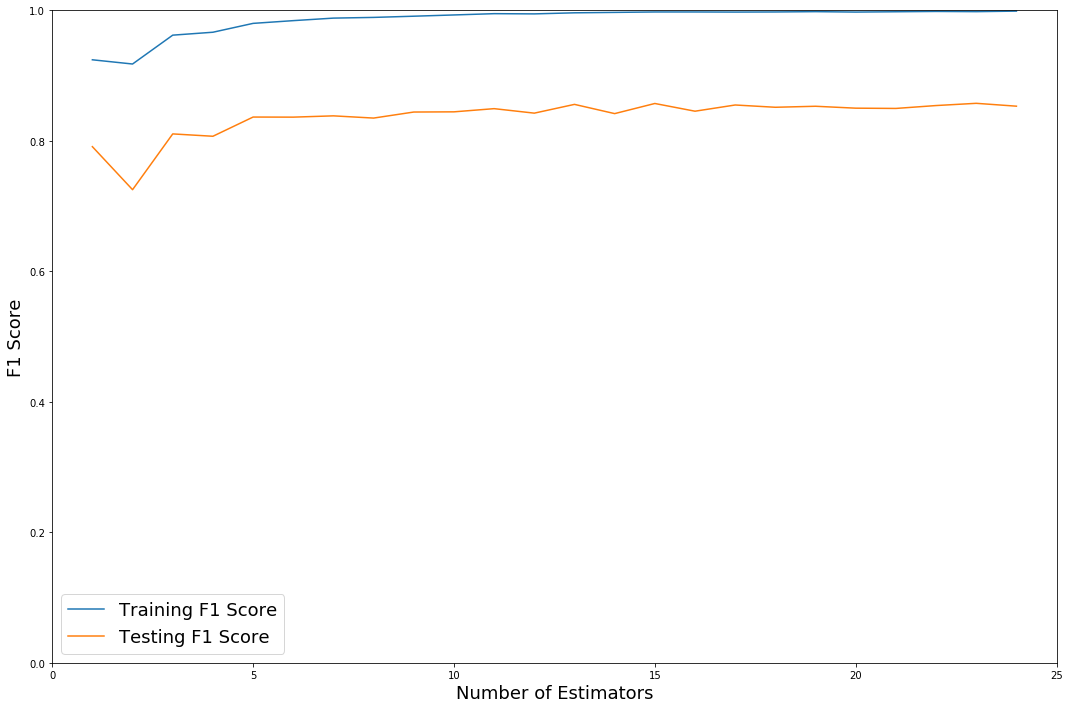

In [184]:
from sklearn.ensemble import RandomForestClassifier

F1Score_plot(RandomForestClassifier, X_train , Y_train, X_test, Y_test)

<p  style="text-align: justify;"> 
    **(e)**  Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de _AdaBoost_. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n_estimators*), realice un gráfico resumen del F1-_score_ de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).
    </p>

Test F1 Score 0.862151 con 20 estimadores


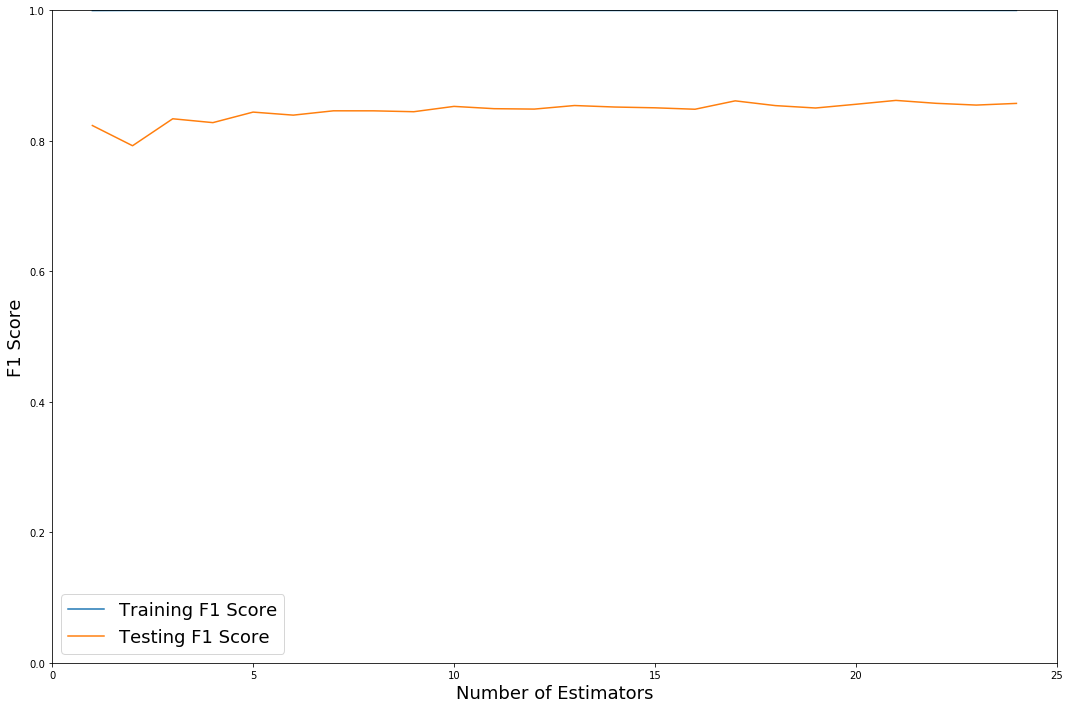

In [185]:
from sklearn.ensemble import AdaBoostClassifier as ABC

F1Score_plot(ABC, X_train , Y_train, X_test, Y_test)

<p  style="text-align: justify;"> 
    **(f)** Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos anteriores. Compare y analice estas 4 maneras de resolver el problema definido en b).
</p>

In [194]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB as MNB

model_MNB = MNB()
model_MNB.fit(X_train, Y_train)
y_train_pred_mnb = model_MNB.predict(X_train)
y_test_pred_mnb = model_MNB.predict(X_test)

pca_model = PCA(n_components=11)
pca_model.fit(X_train,Y_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)
lda_model = LDA()
lda_model.fit(X_train,Y_train)
X_lda_train = lda_model.transform(X_train)
X_lda_test = lda_model.transform(X_test)

model = LR()
model.fit(X_pca_train,Y_train)
y_pca_pred_train = model.predict(X_pca_train)
y_pca_pred_test = model.predict(X_pca_test)
model.fit(X_lda_train,Y_train)
y_lda_pred_train = model.predict(X_lda_train)
y_lda_pred_test = model.predict(X_lda_test)

model = SVC()
model.fit(X_pca_train,Y_train)
sy_pca_pred_train = model.predict(X_pca_train)
sy_pca_pred_test = model.predict(X_pca_test)
model.fit(X_lda_train,Y_train)
sy_lda_pred_train = model.predict(X_lda_train)
sy_lda_pred_test = model.predict(X_lda_test)

model_MLPC = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=0)
model_MLPC.fit(X_train, Y_train) 
y_train_pred_mlpc = model_MLPC.predict(X_train)
y_test_pred_mlpc = model_MLPC.predict(X_test)

print("Train MNB f1 score: %f"%f1_score(Y_train, y_train_pred_mnb))
print("Test MNB f1 score: %f"%f1_score(Y_test, y_test_pred_mnb))
print("---------------------------")
print("Train MLPC f1 score: %f"%f1_score(Y_train, y_train_pred_mlpc))
print("Test MLPC f1 score: %f"%f1_score(Y_test, y_test_pred_mlpc))
print("---------------------------")
print("Train PCA + LR f1 score: %f"%f1_score(Y_train, y_pca_pred_train))
print("Test PCA + LR f1 score: %f"%f1_score(Y_test, y_pca_pred_test))
print("---------------------------")
print("Train LDA + LR f1 score: %f"%f1_score(Y_train, y_lda_pred_train))
print("Test LDA + LR f1 score: %f"%f1_score(Y_test, y_lda_pred_test))
print("---------------------------")
print("Train LDA + SVC f1 score: %f"%f1_score(Y_train, sy_lda_pred_train.round()))
print("Test LDA + SVC f1 score: %f"%f1_score(Y_test, sy_lda_pred_test.round()))
print("---------------------------")
print("Train PCA + SVC f1 score: %f"%f1_score(Y_train, sy_pca_pred_train.round()))
print("Test PCA + SVC f1 score: %f"%f1_score(Y_test, sy_pca_pred_test.round()))

Train MNB f1 score: 0.722720
Test MNB f1 score: 0.713043
---------------------------
Train MLPC f1 score: 0.774820
Test MLPC f1 score: 0.781367
---------------------------
Train PCA + LR f1 score: 0.810643
Test PCA + LR f1 score: 0.790588
---------------------------
Train LDA + LR f1 score: 0.810417
Test LDA + LR f1 score: 0.788390
---------------------------
Train LDA + SVC f1 score: 0.809398
Test LDA + SVC f1 score: 0.785647
---------------------------
Train PCA + SVC f1 score: 0.927829
Test PCA + SVC f1 score: 0.798548


<p  style="text-align: justify;"> 
    **(g)**  Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de _Random Forest_, implementelo sobre alguno de los ensambladores entrenados en d), haga un ranking de importancia de atributos ¿Es posible implementar este criterio sobre una técnica de _boost_ como lo es _AdaBoost_?
</p>

In [188]:
model = RandomForestClassifier(n_estimators = 84, max_depth = 20, n_jobs =-1)
model.fit(X_train , Y_train)

#Return the feature importances(the higher, the more important the feature)
w_RFC = model.feature_importances_

model = ABC(base_estimator=DTC(max_depth=20), n_estimators = 65)
model.fit(X_train , Y_train)

w_ABC = model.feature_importances_


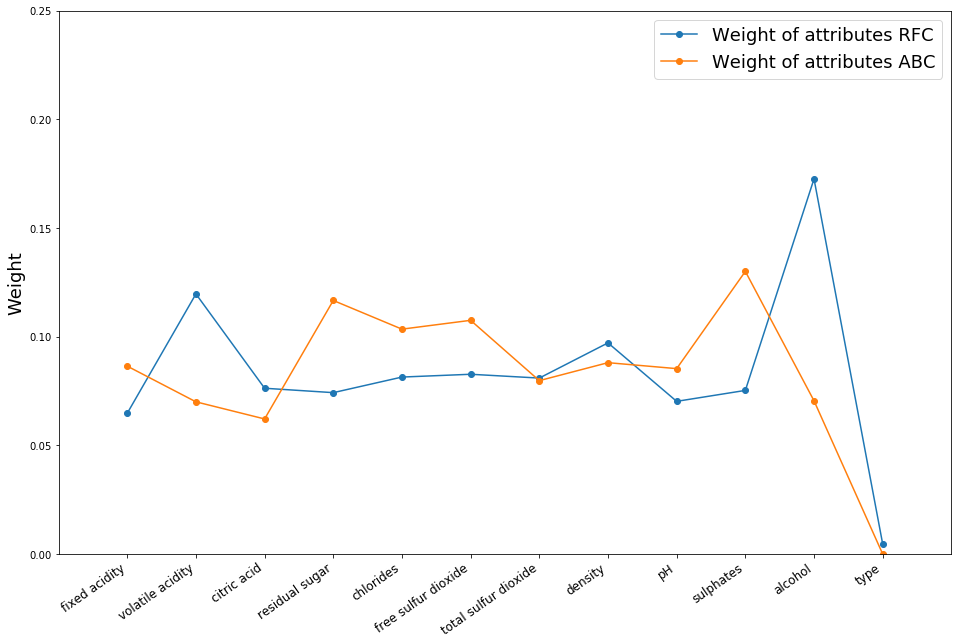

In [195]:
str_attributes = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol", "type"]
attributes = range(1,13)

plt.figure(figsize=(16,10))
weights_plot = plt.subplot(1,1,1)
weights_plot.plot(attributes, w_RFC, label='Weight of attributes RFC', marker='o')
weights_plot.plot(attributes, w_ABC, label='Weight of attributes ABC', marker='o')
plt.legend(loc=1, fontsize=18)
plt.ylabel('Weight', fontsize=18)
#plt.xlabel('Attributes', fontsize=18)
plt.axis([0, 13,0.0, .25])
plt.xticks(attributes, str_attributes, size='large', rotation=80)

for label in weights_plot.get_xmajorticklabels():
    label.set_rotation(35)
    label.set_horizontalalignment("right")

plt.show()

<p  style="text-align: justify;"> 
    Es posible implementarlo pero sería redundar, ya que Adaboost, al contrario que las redes neuronales y las SVM, selecciona solo los atributos que dan pontencial información al proceso de predicción, por lo que no solo disminuye la dimensionalidad del proceso, sino que también disminuye el tiempo de computo de predicción despreciando los atributos que no aportan información alguna. 
</p>

# 4 Reconocimiento de Imágenes Sign Gestures

<p  style="text-align: justify;"> 
    MNIST es un dataset muy popular de dígitos escrito a mano que a servido para probar distintos algoritmos de Machine Learning relacionados con Computer Vision. Buscando nuevos desafíos, investigadores generaron un dataset que podría usarse eventualmente en aplicaciones reales, Sign Gestures, consta de imagenes del lenguaje de señas, estas tienen una resolución de 28x28 pixeles representados en una escala de grises 0-255. La versión utilizada se atribuye a [8] y viene separada en 27455 ejemplos de entrenamiento y 7172 casos de pruebas. Las clases son mutuamente excluyentes y corresponden a las letras del alfabeto (ver imagen).
</p>
<img src="Gestos.png" style="height:350px">

<p  style="text-align: justify;"> 
    **(a)**  Construya una función que cargue todos los datos de entrenamiento y pruebas del problema generando como salida: (i) dos matrices $X_{tr}, Y_{tr}$, correspondientes a las imágenes y etiquetas de entrenamiento, (ii) dos matrices  $X_{t}, Y_{t}$, correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos matrices  $X_{v}, Y_{v}$ correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraído desde el conjunto de entrenamiento original y no debe superar las 7000 imágenes.
</p>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train.label.values
    x_tr = train.iloc[:,1:]
    y_t = test.label.values
    x_t = test.iloc[:,1:]
    x_tr, x_v, y_tr, y_v = train_test_split(x_tr, y_tr, test_size=0.25, random_state=1) 
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)

x_tr, x_v, x_t, y_tr, y_v , y_t = load_data()

<p  style="text-align: justify;"> 
    **(b)**  Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo escalando los datos de acuerdo a la intensidad máxima de pixel (i.e., dividiendo por 255) y luego centrando y escalándolos como en actividades anteriores.
</p>

In [3]:
from sklearn.preprocessing import StandardScaler
def image_scale(X_tr,X_v,X_t):
    X_tr=X_tr/255
    X_v=X_v/255
    X_t=X_t/255
    scalerX = StandardScaler()
    X_train = scalerX.fit_transform(X_tr)
    X_val = scalerX.fit_transform(X_v)
    X_test = scalerX.transform(X_t)
    return X_train,X_val,X_test
X_train,X_val,X_test = image_scale(x_tr,x_v,x_t)

<p  style="text-align: justify;"> 
    **(c)**  Diseñe, entrene y evalúe una red neuronal para el problema partir de la representación original de las imágenes. Experimente con distintas arquitecturas, pre-procesamientos y métodos de entrenamiento, midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de desempeño, decida qué modelo, de entre todos los evaluados, medirá finalmente en el conjunto de test. Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o igual a 0.2.
</p>

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model_S = Sequential()
model_S.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model_S.add(Dense(30, init='uniform', activation='relu'))
model_S.add(Dense(25, init='uniform', activation='softmax'))
model_S.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model_S.fit(x_tr.values, to_categorical(y_tr), epochs=50, 
          batch_size=128, verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

Train on 20591 samples, validate on 6864 samples
Epoch 1/50
20591/20591 [==============================] - 1s 46us/step - loss: 3.3072 - acc: 0.0460 - val_loss: 3.2078 - val_acc: 0.0459
Epoch 2/50
20591/20591 [==============================] - 1s 37us/step - loss: 3.2041 - acc: 0.0475 - val_loss: 3.2010 - val_acc: 0.0459
Epoch 3/50
20591/20591 [==============================] - 1s 38us/step - loss: 3.1985 - acc: 0.0475 - val_loss: 3.1965 - val_acc: 0.0459
Epoch 4/50
20591/20591 [==============================] - 1s 38us/step - loss: 3.1948 - acc: 0.0475 - val_loss: 3.1934 - val_acc: 0.0459
Epoch 5/50
20591/20591 [==============================] - 1s 38us/step - loss: 3.1921 - acc: 0.0475 - val_loss: 3.1910 - val_acc: 0.0459
Epoch 6/50
20591/20591 [==============================] - 1s 38us/step - loss: 3.1901 - acc: 0.0475 - val_loss: 3.1893 - val_acc: 0.0459
Epoch 7/50
20591/20591 [==============================] - 1s 39us/step - loss: 3.1885 - acc: 0.0475 - val_loss: 3.1879 - val_acc:

<p  style="text-align: justify;"> 
    **(d)**  Para la mejor red entrenada anteriormente construya la matriz de confusión de las distintas clases, para asi visualizar cuáles son las clases más difíciles de clasificar y con cuáles se confunden. Comente.
</p>

In [71]:
from sklearn.metrics import confusion_matrix
labels = ["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]


y_pred = model_S.predict_classes(x_tr)

matrix = confusion_matrix(y_tr, y_pred)
df = pd.DataFrame(data=matrix,columns=labels)
df.index= labels
print(df)

   A  B  C  D  E  F  G  H  I  K ...  P  Q    R  S  T  U  V  W  X  Y
A  0  0  0  0  0  0  0  0  0  0 ...  0  0  860  0  0  0  0  0  0  0
B  0  0  0  0  0  0  0  0  0  0 ...  0  0  777  0  0  0  0  0  0  0
C  0  0  0  0  0  0  0  0  0  0 ...  0  0  838  0  0  0  0  0  0  0
D  0  0  0  0  0  0  0  0  0  0 ...  0  0  907  0  0  0  0  0  0  0
E  0  0  0  0  0  0  0  0  0  0 ...  0  0  723  0  0  0  0  0  0  0
F  0  0  0  0  0  0  0  0  0  0 ...  0  0  891  0  0  0  0  0  0  0
G  0  0  0  0  0  0  0  0  0  0 ...  0  0  823  0  0  0  0  0  0  0
H  0  0  0  0  0  0  0  0  0  0 ...  0  0  773  0  0  0  0  0  0  0
I  0  0  0  0  0  0  0  0  0  0 ...  0  0  884  0  0  0  0  0  0  0
K  0  0  0  0  0  0  0  0  0  0 ...  0  0  826  0  0  0  0  0  0  0
L  0  0  0  0  0  0  0  0  0  0 ...  0  0  930  0  0  0  0  0  0  0
M  0  0  0  0  0  0  0  0  0  0 ...  0  0  777  0  0  0  0  0  0  0
N  0  0  0  0  0  0  0  0  0  0 ...  0  0  850  0  0  0  0  0  0  0
O  0  0  0  0  0  0  0  0  0  0 ...  0  0  901  

<p  style="text-align: justify;"> 
    **(e)**  Entrene una SVM no lineal sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de validación para seleccionar hiper-parámetros, como el nivel de regularización aplicado y/o la función de kernel a utilizar.

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()
model.fit(x_tr,y_tr)
y_pred_train = model.predict(x_tr)
y_pred_val = model.predict(x_v)
y_pred_test = model.predict(x_t)
model.fit(X_train,y_tr)
y_pred_train2 = model.predict(X_train)
y_pred_val2 = model.predict(X_val)
y_pred_test2 = model.predict(X_test)
print("Accuracy sin pre procesamiento")
print("SVC accuracy: %f"%(1-accuracy_score(y_tr, y_pred_train)))
print("SVC accuracy: %f"%(1-accuracy_score(y_v, y_pred_val)))
print("SVC accuracy: %f"%(1-accuracy_score(y_t, y_pred_test)))
print("Accuracy con pre procesamiento")
print("SVC accuracy: %f"%(1-accuracy_score(y_tr, y_pred_train2)))
print("SVC accuracy: %f"%(1-accuracy_score(y_v, y_pred_val2)))
print("SVC accuracy: %f"%(1-accuracy_score(y_t, y_pred_test2)))

Accuracy sin pre procesamiento
SVC accuracy: 0.000000
SVC accuracy: 0.788024
SVC accuracy: 0.979922
Accuracy con pre procesamiento
SVC accuracy: 0.000049
SVC accuracy: 0.000146
SVC accuracy: 0.155605


<p  style="text-align: justify;"> 
    **(f)** Entrene una árbol de clasificación sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de validación para seleccionar hiper-parámetros, como la profundidad máxima del árbol.
</p>

C:\Users\EntE\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


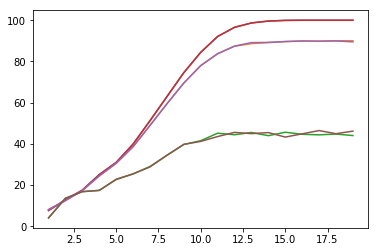

In [4]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
model = Tree() #edit the train_model function
max_depths = range(1,20)
acc_train = []
acc_val = []
acc_test = []
pre_acc_train = []
pre_acc_val = []
pre_acc_test = []
for i in max_depths:
    model.set_params(max_depth=i,criterion='entropy',splitter='best')
    model.fit(x_tr,y_tr)
    y_pred_train = model.predict(x_tr)
    y_pred_val = model.predict(x_v)
    y_pred_test = model.predict(x_t)
    model.fit(X_train,y_tr)
    y_pred_train2 = model.predict(X_train)
    y_pred_val2 = model.predict(X_val)
    y_pred_test2 = model.predict(X_test)
    acc_train.append(accuracy_score(y_tr,y_pred_train)*100)
    acc_val.append(accuracy_score(y_v,y_pred_val)*100)
    acc_test.append(accuracy_score(y_t,y_pred_test)*100)
    pre_acc_train.append(accuracy_score(y_tr,y_pred_train2)*100)
    pre_acc_val.append(accuracy_score(y_v,y_pred_val2)*100)
    pre_acc_test.append(accuracy_score(y_t,y_pred_test2)*100)
plt.plot(max_depths,acc_train)
plt.plot(max_depths,acc_val)
plt.plot(max_depths,acc_test)
plt.plot(max_depths,pre_acc_train)
plt.plot(max_depths,pre_acc_val)
plt.plot(max_depths,pre_acc_test)
plt.legend(loc=0)
plt.show()